In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. Importing all the csv stock files into a pandas dataframe

In [2]:
apple = pd.read_csv("Apple_Historical_Stocks.csv")
amazon = pd.read_csv("Amazon_Historical_Stocks.csv")
meta = pd.read_csv("Meta_Historical_Stocks.csv")
microsoft = pd.read_csv("Microsoft_Historical_Stocks.csv")
netflix = pd.read_csv("Netflix_Historical_Stocks.csv")

In [3]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/19/2024,$224.31,49151450,$224.82,$226.80,$223.275
1,07/18/2024,$224.18,66034590,$230.28,$230.44,$222.27
2,07/17/2024,$228.88,57345880,$229.45,$231.4599,$226.64
3,07/16/2024,$234.82,43234280,$235.00,$236.27,$232.33
4,07/15/2024,$234.40,62631250,$236.48,$237.23,$233.09


2. Adding a stock label to each stock

In [4]:
apple['Stock'] = 'Apple'
amazon['Stock'] = 'Amazon'
meta['Stock'] = 'Meta'
microsoft['Stock'] = 'Microsoft'
netflix['Stock'] = 'Netflix'

In [5]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low,Stock
0,07/19/2024,$224.31,49151450,$224.82,$226.80,$223.275,Apple
1,07/18/2024,$224.18,66034590,$230.28,$230.44,$222.27,Apple
2,07/17/2024,$228.88,57345880,$229.45,$231.4599,$226.64,Apple
3,07/16/2024,$234.82,43234280,$235.00,$236.27,$232.33,Apple
4,07/15/2024,$234.40,62631250,$236.48,$237.23,$233.09,Apple


3. Checking each feature's data types to convert if necessary

In [6]:
apple.dtypes

Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
Stock         object
dtype: object

In [7]:
stocks = [apple, amazon, meta, microsoft, netflix]
for stock in stocks:
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock['Open'] = stock['Open'].str.replace('$', '')
    stock['Open'] = pd.to_numeric(stock['Open'])
    stock['Close/Last'] = stock['Close/Last'].str.replace('$', '')
    stock['Close/Last']= pd.to_numeric(stock['Close/Last'])
    stock['High'] = stock['High'].str.replace('$', '')
    stock['High']= pd.to_numeric(stock['High'])
    stock['Low'] = stock['Low'].str.replace('$', '')
    stock['Low']= pd.to_numeric(stock['Low'])

In [8]:
apple.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
Stock                 object
dtype: object

4. Visualize the stock data

Text(0.5, 1.0, 'Opening Price of Apple for 5 Years')

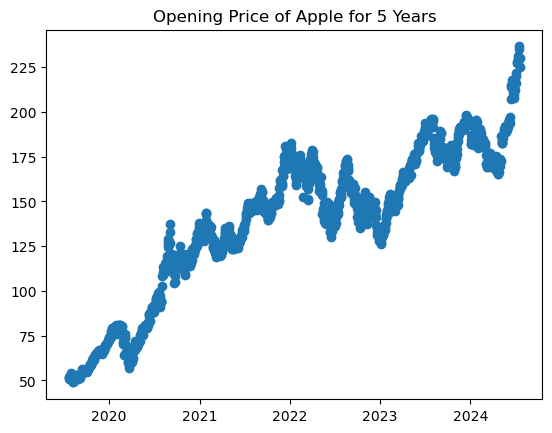

In [9]:
plt.scatter(apple['Date'], apple['Open'])
plt.title('Opening Price of Apple for 5 Years')

5. Combine all the seperate dataframes into one

In [10]:
df = pd.concat([apple, amazon, meta, microsoft, netflix], keys = ['Apple', 'Amazon', 'Meta', 'Microsoft', 'Netflix'])

In [11]:
print(df)

                   Date  Close/Last    Volume    Open      High      Low  \
Apple   0    2024-07-19      224.31  49151450  224.82  226.8000  223.275   
        1    2024-07-18      224.18  66034590  230.28  230.4400  222.270   
        2    2024-07-17      228.88  57345880  229.45  231.4599  226.640   
        3    2024-07-16      234.82  43234280  235.00  236.2700  232.330   
        4    2024-07-15      234.40  62631250  236.48  237.2300  233.090   
...                 ...         ...       ...     ...       ...      ...   
Netflix 1253 2019-07-26      335.78  10847500  328.79  336.0000  327.500   
        1254 2019-07-25      326.46  10798500  318.86  327.6900  316.300   
        1255 2019-07-24      317.94  11961820  310.51  319.9900  307.250   
        1256 2019-07-23      307.30   9171068  311.44  313.5000  306.000   
        1257 2019-07-22      310.62  17725330  312.00  314.5400  305.810   

                Stock  
Apple   0       Apple  
        1       Apple  
        2      

In [12]:
df.info

<bound method DataFrame.info of                    Date  Close/Last    Volume    Open      High      Low  \
Apple   0    2024-07-19      224.31  49151450  224.82  226.8000  223.275   
        1    2024-07-18      224.18  66034590  230.28  230.4400  222.270   
        2    2024-07-17      228.88  57345880  229.45  231.4599  226.640   
        3    2024-07-16      234.82  43234280  235.00  236.2700  232.330   
        4    2024-07-15      234.40  62631250  236.48  237.2300  233.090   
...                 ...         ...       ...     ...       ...      ...   
Netflix 1253 2019-07-26      335.78  10847500  328.79  336.0000  327.500   
        1254 2019-07-25      326.46  10798500  318.86  327.6900  316.300   
        1255 2019-07-24      317.94  11961820  310.51  319.9900  307.250   
        1256 2019-07-23      307.30   9171068  311.44  313.5000  306.000   
        1257 2019-07-22      310.62  17725330  312.00  314.5400  305.810   

                Stock  
Apple   0       Apple  
       

In [13]:
df.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
Stock                 object
dtype: object

6. Check for any missing values

In [14]:
missing_values = df.isnull().sum()
print(missing_values)

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
Stock         0
dtype: int64


In [16]:
datapath = '../data'
df.to_csv("stocks.csv")